<a href="https://colab.research.google.com/github/deekshaaj05/1RV23BT001---Bioinformatics-Lab/blob/main/1RV23BT001_Exp_3_Retrieval_of_Medical_Imaging_Records_from_Leigh_Disease_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## DICOM: load data and visualize
!pip install pydicom
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DICOM Rows x Columns: 512 x 512
Pixel data type: uint16


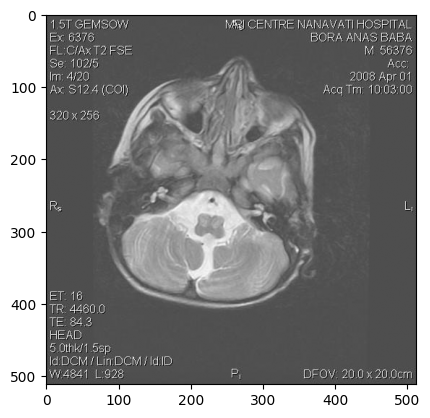

In [ ]:
import os
from PIL import Image
import numpy as np
import pydicom
from pydicom.dataset import Dataset, FileDataset
from pydicom.uid import generate_uid, ExplicitVRLittleEndian, MRImageStorage
import datetime
import matplotlib.pyplot as plt
import random

# Paths
jpg_folder = "/content/drive/MyDrive/leighs_disease"  # folder containing JPEGs
dcm_folder = "/content/drive/MyDrive/leighs_disease_dcm"
os.makedirs(dcm_folder, exist_ok=True)

# List JPEG images
images = [f for f in os.listdir(jpg_folder) if f.lower().endswith((".jpg", ".jpeg"))]

for idx, img_file in enumerate(images):
    img_path = os.path.join(jpg_folder, img_file)
    img = Image.open(img_path).convert('L')  # grayscale
    img_array = np.array(img)

    # Create file meta for DICOM
    file_meta = pydicom.Dataset()
    file_meta.MediaStorageSOPClassUID = MRImageStorage
    file_meta.MediaStorageSOPInstanceUID = generate_uid()
    file_meta.TransferSyntaxUID = ExplicitVRLittleEndian

    # Create DICOM dataset
    ds = FileDataset(
        filename_or_obj=None,
        dataset={},
        file_meta=file_meta,
        preamble=b"\0" * 128
    )

    # Set image info
    ds.Rows, ds.Columns = img_array.shape
    ds.PhotometricInterpretation = "MONOCHROME2"
    ds.SamplesPerPixel = 1
    ds.BitsAllocated = 16
    ds.BitsStored = 16
    ds.HighBit = 15
    ds.PixelRepresentation = 0
    img_array_16bit = img_array.astype(np.uint16) * 256  # scale to 16-bit
    ds.PixelData = img_array_16bit.tobytes()

    # Save DICOM
    dcm_filename = os.path.join(dcm_folder, img_file.replace(".jpg", ".dcm"))
    ds.save_as(dcm_filename)

# Read and display random DICOM
dcm_files = [f for f in os.listdir(dcm_folder) if f.lower().endswith(".dcm")]
random_dcm_file = os.path.join(dcm_folder, random.choice(dcm_files))
ds = pydicom.dcmread(random_dcm_file)

plt.imshow(ds.pixel_array, cmap='gray')

print("DICOM Rows x Columns:", ds.Rows, "x", ds.Columns)
print("Pixel data type:", ds.pixel_array.dtype)